In [95]:
#project 2
from sklearn.cluster import KMeans
import pandas as pd
from pathlib import Path
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt


In [2]:
#Read CSV
Path="Resources/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
price_df= pd.read_csv(Path)
price_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,232527.0,...,1124579.0,1119261.0,1114733.0,1112570.0,1113554.0,1108906.0,1104331.0,1098915.0,1089614.0,1090168.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,208780.0,...,488778.0,489319.0,490664.0,492714.0,495483.0,498200.0,500780.0,503294.0,505577.0,508007.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,184917.0,...,913735.0,916274.0,916593.0,920113.0,931353.0,934916.0,934687.0,930893.0,934775.0,945772.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,199929.0,...,336901.0,337728.0,338452.0,339876.0,341435.0,343897.0,346910.0,351188.0,355336.0,360190.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,281068.0,...,629766.0,629807.0,630985.0,632529.0,635442.0,638288.0,641416.0,644506.0,647307.0,650905.0


In [4]:
#Filter dataframe
price_df=price_df.drop(columns=["RegionID","SizeRank","RegionName","RegionType","StateName","Metro","CountyName"]).copy()
price_df

,State,City,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,NY,New York,232527.0,231079.0,231156.0,231131.0,231660.0,232303.0,232189.0,233004.0,...,1124579.0,1119261.0,1114733.0,1112570.0,1113554.0,1108906.0,1104331.0,1098915.0,1089614.0,1090168.0
1,IL,Chicago,208780.0,208625.0,208220.0,208086.0,207527.0,207709.0,207498.0,208100.0,...,488778.0,489319.0,490664.0,492714.0,495483.0,498200.0,500780.0,503294.0,505577.0,508007.0
2,NY,New York,184917.0,184955.0,185058.0,185717.0,186675.0,187460.0,187721.0,187799.0,...,913735.0,916274.0,916593.0,920113.0,931353.0,934916.0,934687.0,930893.0,934775.0,945772.0
3,TX,Katy,199929.0,200176.0,199980.0,198794.0,197659.0,196995.0,197755.0,197444.0,...,336901.0,337728.0,338452.0,339876.0,341435.0,343897.0,346910.0,351188.0,355336.0,360190.0
4,IL,Chicago,281068.0,280811.0,280293.0,280152.0,279477.0,279565.0,279073.0,279632.0,...,629766.0,629807.0,630985.0,632529.0,635442.0,638288.0,641416.0,644506.0,647307.0,650905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30338,OR,Central Point,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,147808.0,149015.0,149286.0,149493.0,149872.0,151352.0,152961.0,156051.0,160039.0,164643.0
30339,TX,Texarkana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49084.0,48557.0,48263.0,48361.0,48416.0,48625.0,49064.0,49603.0,50003.0,50320.0
30340,MA,Groton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,387810.0,387823.0,387806.0,388207.0,389813.0,391532.0,393895.0,393194.0,392171.0,393842.0
30341,LA,Choudrant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,200140.0,199806.0,199449.0,199659.0,199228.0,198112.0,196824.0,196220.0,195117.0,192702.0


In [5]:
#extract only CA
ca_price_df=price_df[price_df["State"]=="CA"].dropna()
ca_price_df

,State,City,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
13,CA,San Francisco,333727.0,332205.0,331788.0,330713.0,330535.0,330277.0,330447.0,331116.0,...,1217984.0,1210221.0,1204887.0,1201422.0,1198273.0,1185486.0,1174127.0,1158873.0,1147199.0,1132611.0
21,CA,Hawthorne,175125.0,175464.0,175837.0,176510.0,177126.0,177562.0,177885.0,177949.0,...,705157.0,707157.0,712324.0,720071.0,728462.0,736058.0,743278.0,749048.0,754975.0,761751.0
42,CA,Los Angeles,177917.0,178299.0,178039.0,177720.0,177240.0,176933.0,177205.0,177218.0,...,1503466.0,1509602.0,1519048.0,1529894.0,1539059.0,1546118.0,1554489.0,1562880.0,1574875.0,1585343.0
86,CA,Alameda,183651.0,182684.0,182409.0,181685.0,181500.0,180861.0,180260.0,179867.0,...,1076034.0,1075570.0,1077038.0,1086790.0,1097824.0,1113689.0,1128931.0,1140118.0,1146929.0,1159571.0
92,CA,San Francisco,285314.0,283786.0,282878.0,281548.0,280920.0,280286.0,279710.0,280674.0,...,1613069.0,1604729.0,1598217.0,1598760.0,1598630.0,1584055.0,1571072.0,1557327.0,1551159.0,1540788.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28314,CA,Descanso,167009.0,167041.0,166451.0,165746.0,163654.0,161941.0,160548.0,159442.0,...,421338.0,419075.0,420041.0,422969.0,428102.0,433128.0,436726.0,441366.0,447249.0,454018.0
28858,CA,Woody,75013.0,74805.0,74747.0,74867.0,74980.0,75373.0,75777.0,76507.0,...,270301.0,271855.0,274658.0,276649.0,278883.0,281229.0,284578.0,289189.0,293217.0,298109.0
29239,CA,Big Creek,167163.0,165555.0,163763.0,160645.0,158543.0,157741.0,156650.0,155933.0,...,425119.0,429843.0,436166.0,444691.0,452153.0,457815.0,465162.0,475755.0,487674.0,497245.0
29946,CA,Soda Springs,249238.0,248776.0,248922.0,248505.0,247658.0,247208.0,248418.0,250449.0,...,668444.0,673014.0,684696.0,696142.0,704255.0,707302.0,711321.0,718469.0,728562.0,737694.0


In [6]:
#merge rows based on cities and average the prices
group_ca_price_df=ca_price_df.groupby("City").mean()
group_ca_price_df.head()

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
City,,,,,,,,,,,,,,,,,,,,,
Acampo,140984.0,140052.0,139210.0,137199.0,135968.0,134731.0,133674.0,132725.0,132323.0,132714.0,...,578398.0,579087.0,586502.0,596085.0,609658.0,621864.0,635954.0,651729.0,669519.0,690364.0
Acton,189127.0,189955.0,190421.0,192058.0,192887.0,193723.0,193852.0,194166.0,194213.0,194046.0,...,631413.0,632602.0,638001.0,646720.0,657574.0,667301.0,676827.0,685957.0,694479.0,704614.0
Agoura Hills,279318.0,279063.0,278997.0,279112.0,279307.0,279831.0,280114.0,280615.0,280728.0,280858.0,...,906226.0,906699.0,911689.0,920025.0,929294.0,937900.0,945400.0,952679.0,959266.0,966665.0
Aguanga,107007.0,107761.0,107857.0,108942.0,108802.0,108793.0,108989.0,110434.0,112001.0,113153.0,...,395458.0,397939.0,401105.0,404194.0,407710.0,412951.0,418102.0,424011.0,429866.0,436823.0
Alameda,205976.5,205057.0,204658.5,203799.0,203365.0,202690.5,202019.5,201599.5,201412.0,201588.0,...,1042890.5,1042391.5,1045308.5,1055554.5,1065870.5,1077678.5,1089846.0,1098396.5,1104088.0,1114772.5


In [140]:
yoy_price_list=[]
yoy_price_df=pd.DataFrame()
yoy_price_change_df=pd.DataFrame()
for i in range(1997,2022):
    current_year=group_ca_price_df[f"{i}-01-31"]
    past_year=group_ca_price_df[f"{i-1}-01-31"]
    yoy_price_df[i]=current_year
    yoy_price_change_df[2021-i]=(current_year-past_year)/past_year

yoy_price_change_df

,24,23,22,21,20,19,18,17,16,15,...,9,8,7,6,5,4,3,2,1,0
City,,,,,,,,,,,,,,,,,,,,,
Acampo,-0.057042,-0.016722,0.108645,0.094624,0.142164,0.194160,0.095538,0.217853,0.268392,0.213889,...,-0.012615,0.103311,0.239407,0.103421,0.175641,0.094588,0.106772,0.050103,-0.007639,0.175647
Acton,0.023397,0.004872,0.105920,0.120225,0.068959,0.080048,0.185977,0.187572,0.241996,0.207119,...,-0.067780,0.108590,0.142079,0.052299,0.083193,0.054645,0.054857,0.034580,0.015928,0.123060
Agoura Hills,0.005066,0.034367,0.098719,0.116886,0.108672,0.089206,0.158281,0.199641,0.234678,0.144237,...,-0.060624,0.083090,0.199289,-0.012574,0.056572,0.039106,0.078524,0.002318,0.012258,0.079699
Aguanga,0.097022,-0.003527,0.023082,0.112446,0.064823,0.105409,0.177403,0.143844,0.297591,0.162282,...,-0.009195,0.044737,0.257681,0.154305,0.058337,0.065403,0.125427,0.055889,0.028707,0.092897
Alameda,-0.018007,0.084504,0.117512,0.130523,0.217126,0.077453,0.112450,0.091385,0.186295,0.098309,...,-0.032600,0.191848,0.221739,0.032675,0.146029,0.061798,0.104849,0.020485,0.051593,0.061743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yermo,0.026755,0.041187,0.107574,-0.055910,0.047868,0.093657,0.021160,0.095317,0.223381,0.097798,...,0.059268,0.041414,0.018172,-0.061795,0.025580,0.097739,0.093344,0.062009,-0.028917,0.198005
Yorba Linda,0.005735,0.057806,0.120721,0.098225,0.114894,0.098309,0.168886,0.187816,0.233161,0.124031,...,-0.051532,0.084538,0.189304,-0.004777,0.054890,0.034113,0.048680,0.004160,0.008529,0.098525
Yountville,0.026181,0.051757,0.085840,0.202506,0.219614,0.163492,0.121663,0.114952,0.128773,0.097187,...,-0.078548,0.154645,0.157849,0.081715,0.051237,0.063866,0.114542,0.117676,-0.012964,0.100581


In [73]:
#transpose_yoy_price_change_df=yoy_price_change_df.transpose()
#transpose_yoy_price_change_df["2008":].hvplot.line(figsize=(50,15),rot=90)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [167]:
#yoy_price_change_df["1996-1997"]
#yoy_price_change_df["1996-1997"].idxmax(axis=1)
#yoy_price_change_df.dtypes

In [168]:
#yoy_price_change_df.idxmax(axis=1)

In [143]:
transpose_yoy_price_change_df=yoy_price_change_df.transpose()

In [144]:
# Find when the peek happened 
peek_df=pd.DataFrame()
peek_df["when"] = transpose_yoy_price_change_df.idxmax()
peek_df["pct_increase"]=transpose_yoy_price_change_df.max()
peek_df

,when,pct_increase
City,,
Acampo,16,0.268392
Acton,16,0.241996
Agoura Hills,16,0.234678
Aguanga,16,0.297591
Alameda,7,0.221739
...,...,...
Yermo,16,0.223381
Yorba Linda,16,0.233161
Yountville,20,0.219614


In [146]:
#elbow method, find SSE
k_rng=range(1,13)
sse=[]
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(peek_df[["when","pct_increase"]])
    sse.append(km.inertia_)

C:\Users\Might\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


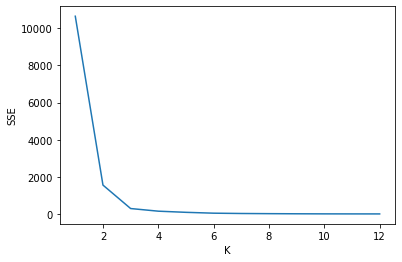

In [147]:
#plot elbow
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_rng,sse)

In [148]:
km_model = KMeans(n_clusters=3)
km_model

KMeans(n_clusters=3)

In [149]:
y_predictd=km_model.fit_predict(peek_df[["when","pct_increase"]])
#y_predictd
peek_df["cluster"]=y_predictd
peek_df

,when,pct_increase,cluster
City,,,
Acampo,16,0.268392,0
Acton,16,0.241996,0
Agoura Hills,16,0.234678,0
Aguanga,16,0.297591,0
Alameda,7,0.221739,1
...,...,...,...
Yermo,16,0.223381,0
Yorba Linda,16,0.233161,0
Yountville,20,0.219614,2


,x,y
0,15.862162,0.259121
1,6.798246,0.271746
2,19.750000,0.262155


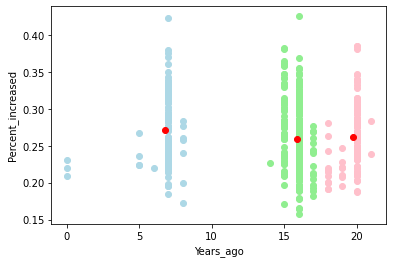

In [163]:
cluster_0=peek_df[peek_df.cluster==0]
cluster_1=peek_df[peek_df.cluster==1]
cluster_2=peek_df[peek_df.cluster==2]
plt.scatter(cluster_0.when,cluster_0.pct_increase, color="lightgreen")
plt.scatter(cluster_1.when,cluster_1.pct_increase, color="lightblue")
plt.scatter(cluster_2.when,cluster_2.pct_increase, color="pink")
plt.xlabel("Years_ago")
plt.ylabel("Percent_increased")
#find cluster centers for 
km_model.cluster_centers_
center_points_df=pd.DataFrame(km_model.cluster_centers_,columns=["x","y"])
display(center_points_df)
plt.scatter(center_points_df.x,center_points_df.y, color="red")

In [173]:
recent_growing_cities_percent_change=peek_df[peek_df["when"]<6]
recent_growing_cities_percent_change

,when,pct_increase,cluster
City,,,
El Sobrante,5,0.235914,1
Hermosa Beach,5,0.224266,1
Huron,0,0.219451,1
Inyokern,0,0.208704,1
Manhattan Beach,5,0.266899,1
Newberry Springs,0,0.230407,1
Richmond,5,0.224635,1


In [183]:
past_growing_cities_percent_change=peek_df[peek_df["when"]>20]
past_growing_cities_percent_change

,when,pct_increase,cluster
City,,,
Brisbane,21,0.238480,2
La Honda,21,0.284096,2


In [192]:

transpose_yoy_price_change_df=yoy_price_change_df.transpose()
recent_growing_cities_df=transpose_yoy_price_change_df[past_growing_cities_percent_change.index]
recent_growing_cities_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [195]:
#See the growth trend. 
transpose_yoy_price_change_df=yoy_price_change_df.transpose()
recent_growing_cities_df=transpose_yoy_price_change_df[recent_growing_cities_percent_change.index]
recent_growing_cities_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [45]:
#transposed_group_ca_price_df=group_ca_price_df.transpose()
#transposed_group_ca_price_df

City,Acampo,Acton,Agoura Hills,Aguanga,Alameda,Alamo,Albany,Alhambra,Aliso Viejo,Alpine,...,Woodbridge,Woodlake,Woodland,Woody,Wrightwood,Yermo,Yorba Linda,Yountville,Yucaipa,Yucca Valley
1996-01-31,140984.0,189127.0,279318.0,107007.0,205976.5,519268.0,215162.0,174666.5,182835.0,248401.0,...,140499.0,83505.0,126744.000000,75013.0,117421.0,50982.0,277661.5,283982.0,134746.0,65755.0
1996-02-29,140052.0,189955.0,279063.0,107761.0,205057.0,515543.0,213857.0,174621.0,183226.0,248871.0,...,140168.0,83248.0,126282.000000,74805.0,116857.0,51029.0,278599.0,284941.0,134186.0,65547.0
1996-03-31,139210.0,190421.0,278997.0,107857.0,204658.5,512075.0,212882.0,174721.5,182878.0,248972.0,...,139632.0,83791.0,126200.666667,74747.0,116057.0,51277.0,278297.5,286029.0,133870.0,65313.0
1996-04-30,137199.0,192058.0,279112.0,108942.0,203799.0,504934.0,211755.0,174916.0,182359.0,249143.0,...,138935.0,84280.0,125808.000000,74867.0,114948.0,51597.0,278177.5,287480.0,133251.0,64784.0
1996-05-31,135968.0,192887.0,279307.0,108802.0,203365.0,495856.0,211241.0,175125.5,181621.0,249069.0,...,138525.0,84998.0,125683.333333,74980.0,113916.0,51736.0,277584.5,288283.0,132855.0,64365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,621864.0,667301.0,937900.0,412951.0,1077678.5,1996807.0,1161087.0,740184.5,669872.0,705571.0,...,480273.0,217357.0,406224.000000,281229.0,339617.0,113084.0,932747.5,1052750.0,420137.0,248911.0
2020-11-30,635954.0,676827.0,945400.0,418102.0,1089846.0,2022829.0,1174722.0,745442.5,675925.0,715955.0,...,487889.0,220418.0,412813.666667,284578.0,343450.0,114160.0,943370.5,1064810.0,424590.0,252651.0
2020-12-31,651729.0,685957.0,952679.0,424011.0,1098396.5,2044018.0,1184064.0,750973.0,683473.0,725416.0,...,495108.0,223658.0,419063.333333,289189.0,348312.0,115908.0,955721.0,1078147.0,429971.0,257550.0
2021-01-31,669519.0,694479.0,959266.0,429866.0,1104088.0,2077690.0,1189380.0,755035.0,690731.0,735549.0,...,503072.0,227243.0,422658.000000,293217.0,353689.0,117595.0,967445.5,1090787.0,435339.0,262567.0


In [17]:
#percent_change of prices
#index_dates=["2006-01-31","2011-01-31","2016-01-31","2021-01-31"]
#percent_change_df=pd.DataFrame(transposed_group_ca_price_df, index=index_dates)
#percent_change_df

In [20]:
#city_list=list(percent_change_df.columns)
#five_years=[]
#ten_years=[]
#fifteen_years=[]
#for city in city_list:
    #five_years.append((percent_change_df[city][3]-percent_change_df[city][2])/percent_change_df[city][2])
    #ten_years.append((percent_change_df[city][3]-percent_change_df[city][1])/percent_change_df[city][1])
    #fifteen_years.append((percent_change_df[city][3]-percent_change_df[city][0])/percent_change_df[city][0])
#print (five_years,ten_years,fifteen_years)

[0.4841821047521298, 0.3131970365664106, 0.22769233525776308, 0.4233784982980358, 0.3366529077450078, 0.19318462434344955, 0.3147652141807783, 0.3458506495879303, 0.23464758622662016, 0.29586127192070666, 0.2784129979955815, 0.3901711566903789, 0.31576803459154723, 0.29763094779929206, 0.3730374433368026, 0.28489382053074724, 0.0313435666449357, 0.4461139947377525, 0.4938994407246224, 0.4367747673465228, 0.3544935507870297, 0.32972996950108374, 0.34129265060910036, 0.4138339088646989, 0.34726395951043704, 0.1672201105441518, 0.35188837392762057, 0.39365602632074187, 0.27828721332224426, 0.3761971560814081, 0.24623186203752945, 0.3547250777373304, 0.14072802308523158, 0.40685254812069777, 0.3510244371733651, 0.305073885022759, 0.37060154220401925, 0.4152187254281495, 0.6328501504248677, 0.3687341229601597, 0.42365223149108, 0.3780273918157303, 0.20477145779493003, 0.2932268120968578, 0.2791879966008468, 0.43713293952096743, 0.5774514974048683, 0.8069233910116534, 0.44938989936011975, 0.

In [12]:
#five years
#five_years_array=np.array(five_years)
#round_to_thousands_5=np.around(five_years_array,4)
#five_years_rounded=list(round_to_thousands_5)
#ten years
#ten_years_array=np.array(ten_years)
#round_to_thousands_10=np.around(ten_years_array,4)
#ten_years_rounded=list(round_to_thousands_10)
#fifteen years
#fifteen_years_array=np.array(fifteen_years)
#round_to_thousands_15=np.around(fifteen_years_array,4)
#fifteen_years_rounded=list(round_to_thousands_15)


In [13]:
#perchange of 5, 10, 15 years in prices
#index_names=["5_years","10_years","15_years"]
#growth_df=pd.DataFrame(index=index_names)
#for i in range(len(city_list)):
    #growth_df[city_list[i]]=[five_years_rounded[i] , ten_years_rounded[i] , fifteen_years_rounded[i]]
#save as csv
#growth_df=growth_df.transpose()
#growth_df

,5_years,10_years,15_years
Acampo,0.4842,1.5996,0.5063
Acton,0.3132,0.7667,0.1823
Agoura Hills,0.2277,0.5629,0.1356
Aguanga,0.4234,1.2638,0.3505
Alameda,0.3367,1.2283,0.9205
...,...,...,...
Yermo,0.4829,0.6026,0.1986
Yorba Linda,0.2065,0.5495,0.1292
Yountville,0.4396,1.0167,0.2401
Yucaipa,0.3470,0.9781,0.0697
